# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
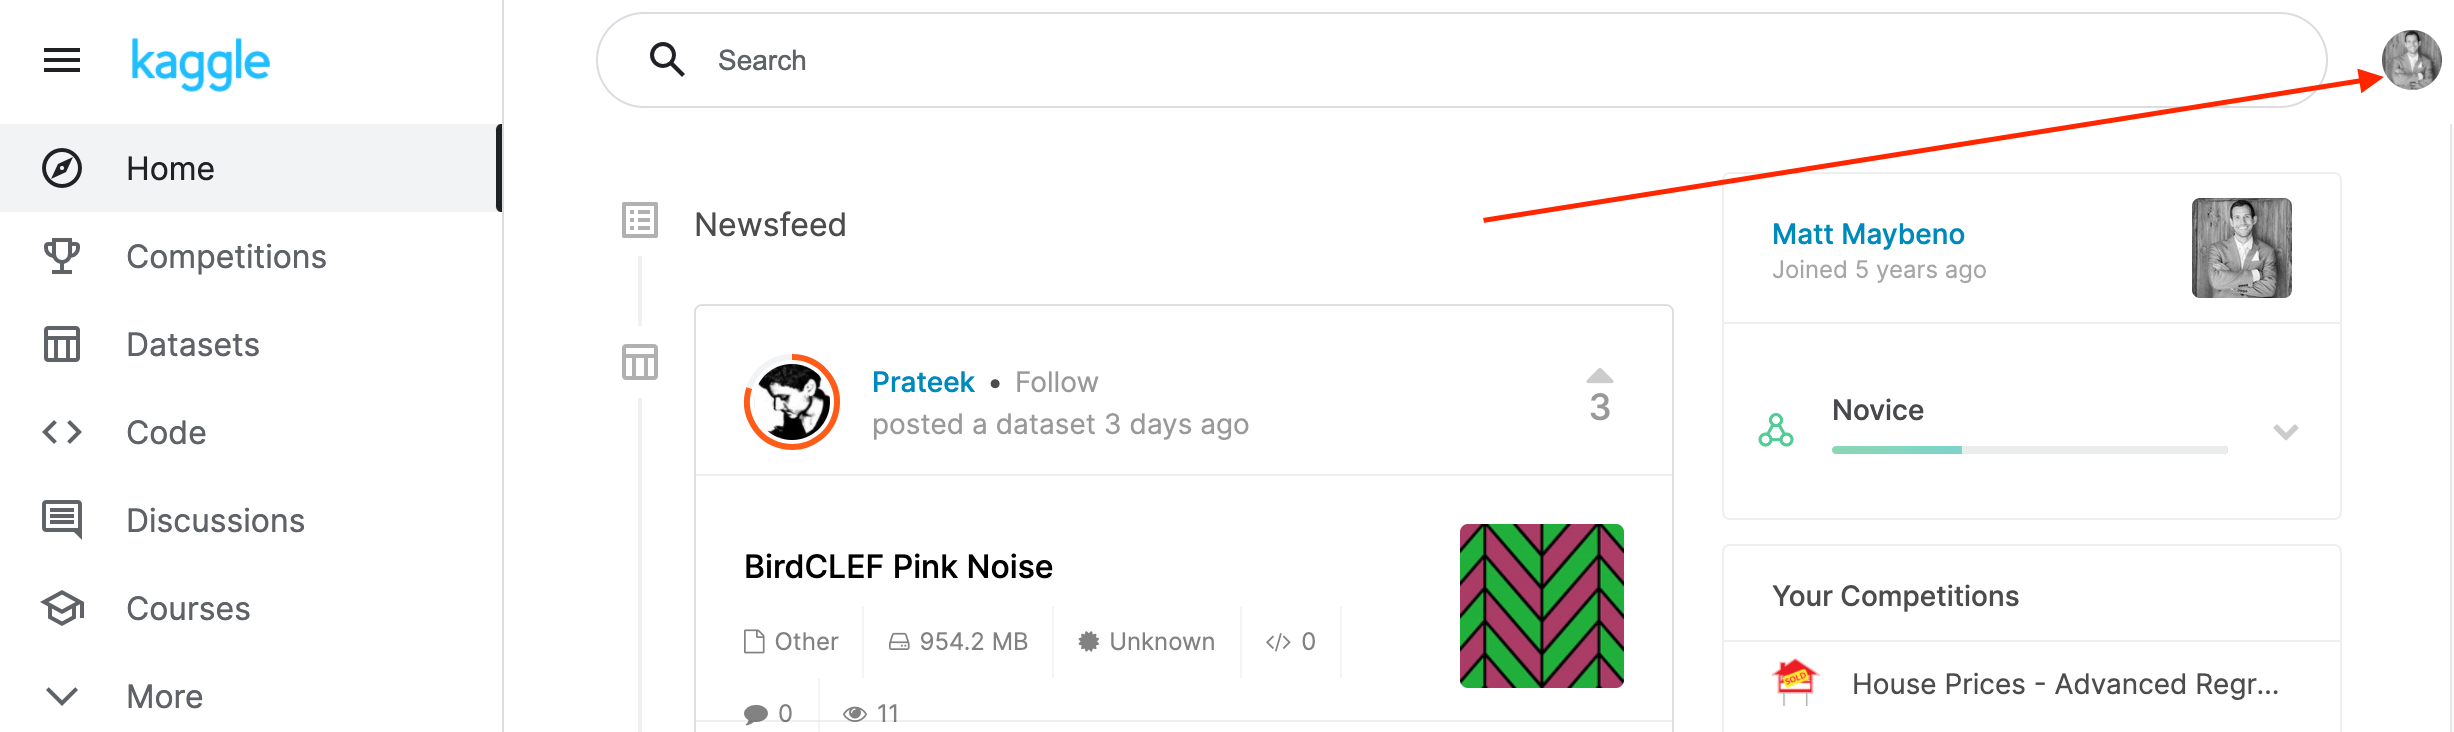
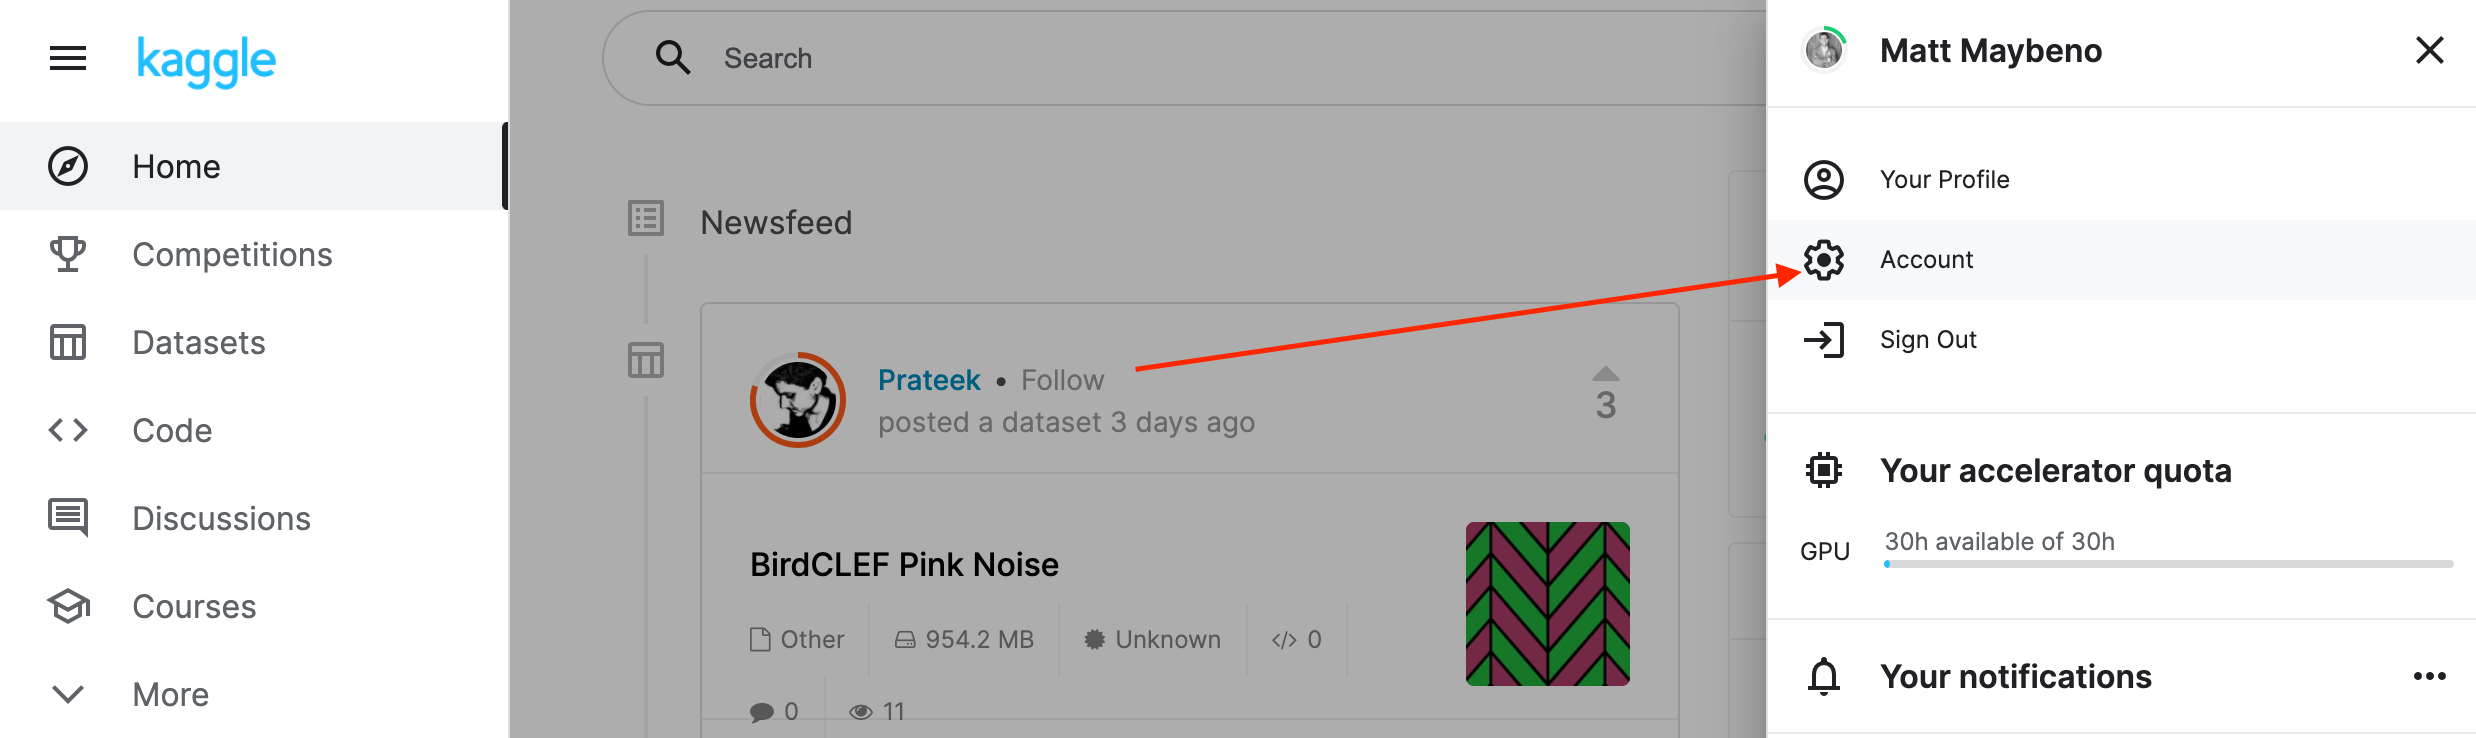
2. Scroll down to API and click Create New API Token.
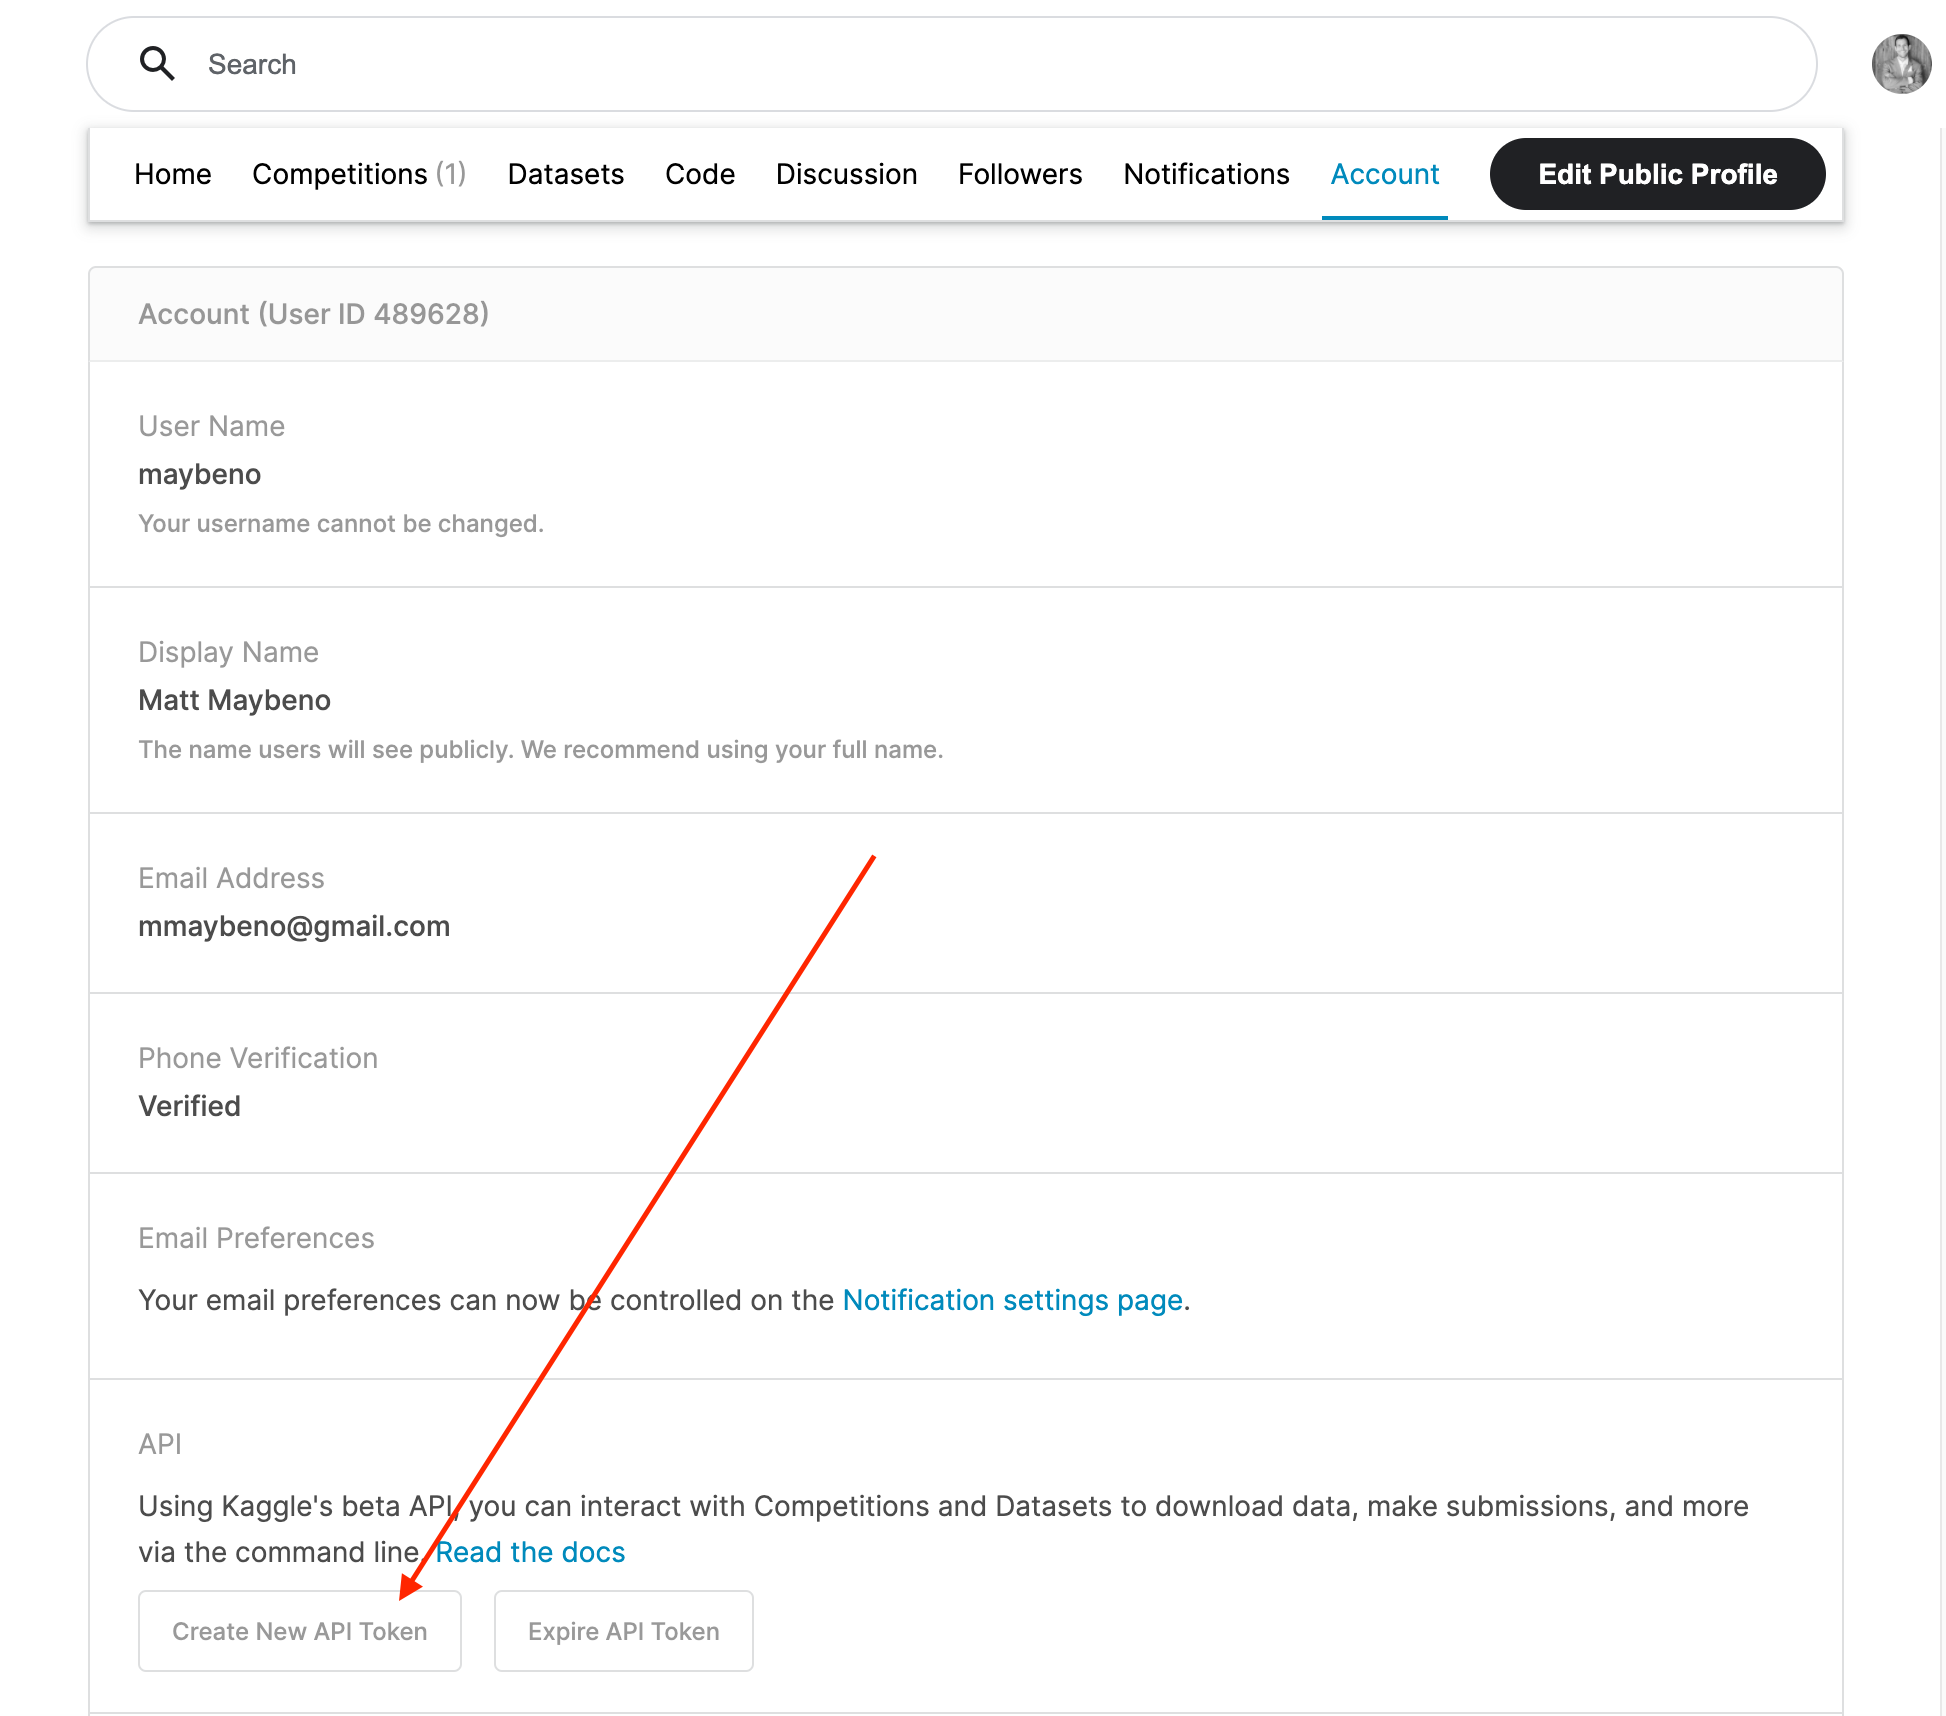
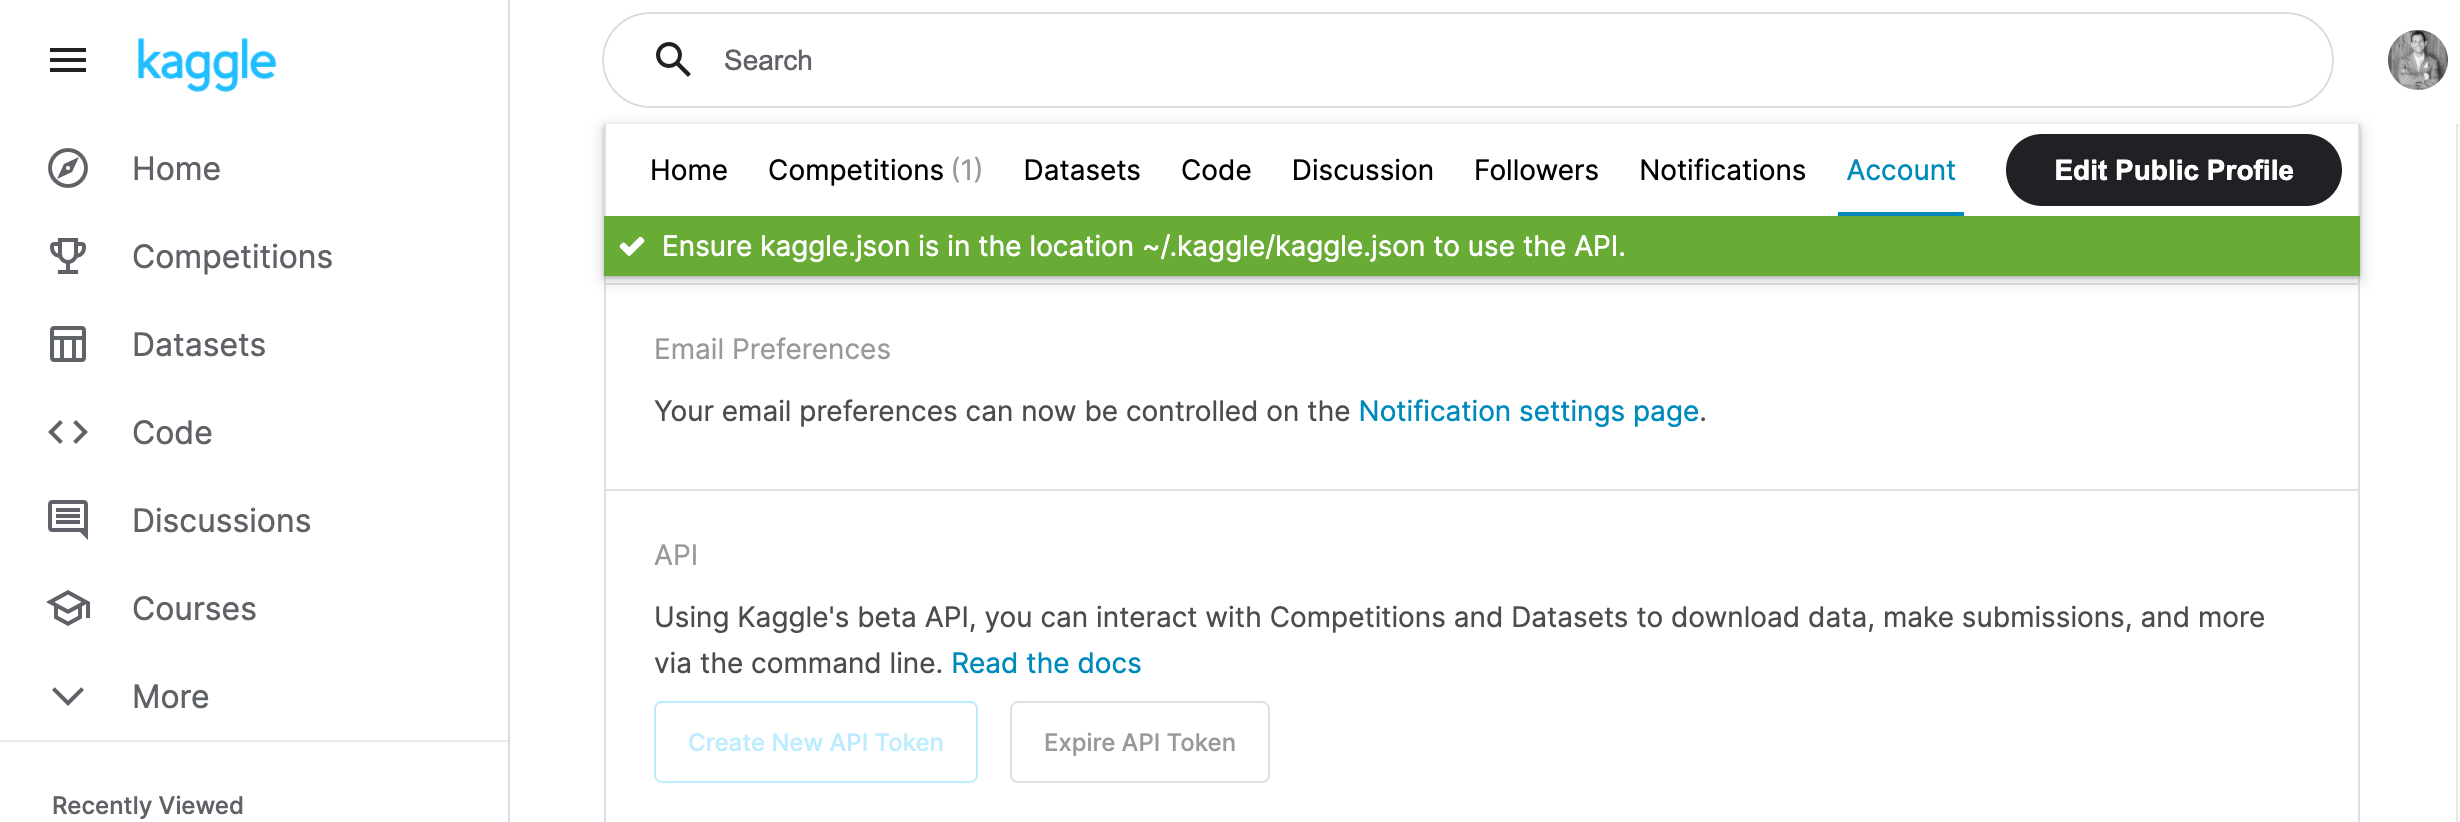
3. Open up `kaggle.json` and use the username and key.
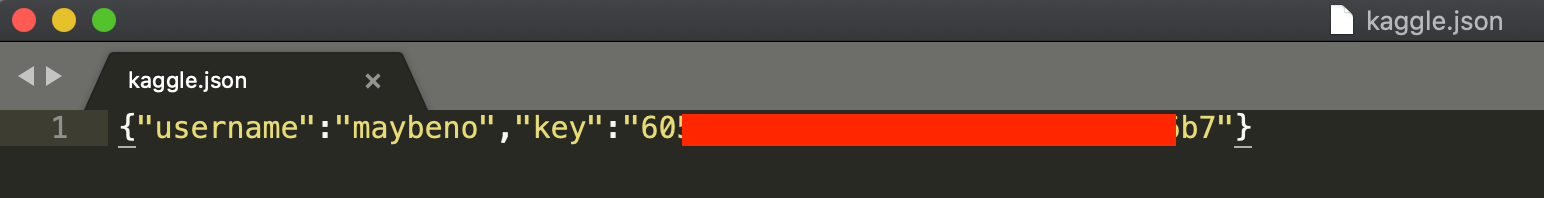

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [5]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-22.0.4-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
  Using cached setuptools-62.0.0-py3-none-any.whl (1.1 MB)
  Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.4.0
    Uninstalling setuptools-59.4.0:
      Successfully uninstalled setuptools-59.4.0
  Using cached mxnet-1.9.0-py3-none-manylinux2014_x86_64.whl (47.3 MB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.2
    Uninstalling bokeh-2.4.2:
      Successfully uninstalled bokeh-2.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 KB 116.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.0/267.0 KB 133.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.2/188.2 KB 237.1 MB/s eta 0:00:00
     ━━━━━━━

### Setup Kaggle API Key

In [6]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "detc0nan"
kaggle_key = "c8caac2a70e1aadd8a8ca29cb39bd95b"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
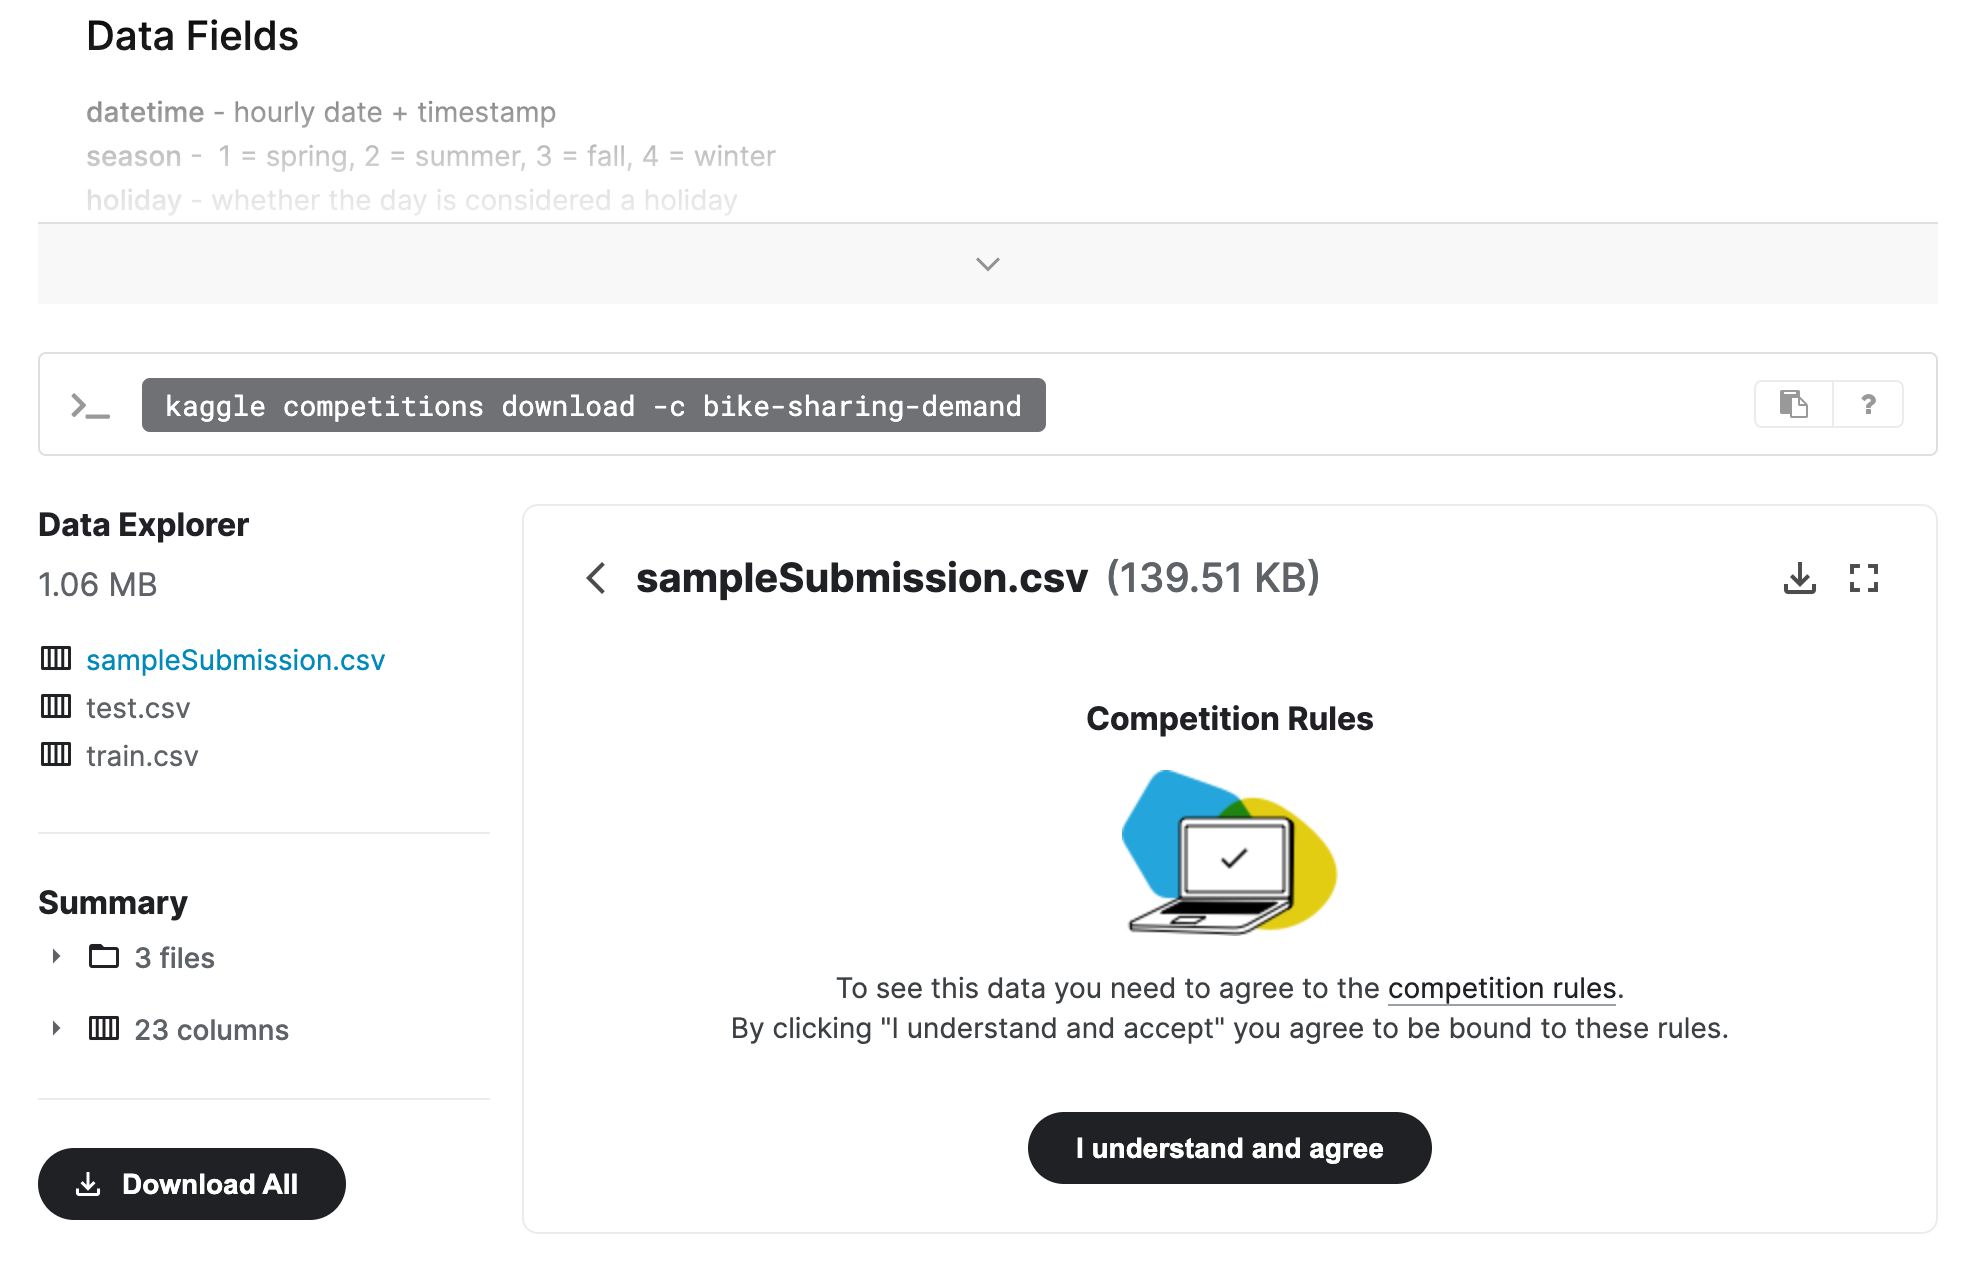

In [8]:
!pip install kaggle

  Using cached kaggle-1.5.12-py3-none-any.whl
  Using cached python_slugify-6.1.1-py2.py3-none-any.whl (9.1 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)


In [9]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from autogluon.tabular import TabularPredictor

/usr/local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [12]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

There's plenty of variation between the min and max values of some features. I guess it would make sense to normalize the data at some point before training the models. But, for a baseline we can leave the data as is and further improve the results by feature engineering.

In [13]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [14]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

**Drop casual and registered columns from train dataset**

In [15]:
train = train.drop(["casual", "registered"], axis=1)

In [16]:
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  count  
0        81        0.0     16  
1        80        0.0     40  
2        80        0.0     32  
3        75        0.0     13  
4        75        0.0      1

In [17]:
#predictor = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(train_data=train, time_limit=600, presets="best_quality")

### Review AutoGluon's training run with ranking of models that did the best.

In [18]:
##predictor.fit_summary()

### Create predictions from test dataset

In [19]:
#predictions = predictor.predict(test)
#predictions.head()

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [20]:
# Describe the `predictions` series to see if there are any negative values
#predictions.describe()

In [21]:
# How many negative values do we have?
#predictions_value_counts = predictions.value_counts()
#predictions_value_counts.loc[predictions_value_counts.index < 0.0]

In [22]:
# Set them to zero
#predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [23]:
#submission["count"] = predictions
#submission.to_csv("submission.csv", index=False)

In [24]:
#!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [25]:
#!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2022-04-04 17:09:50  first raw submission  complete  1.80527      1.80527       
submission.csv  2022-04-04 13:04:35  first raw submission  complete  1.80423      1.80423   

#### Initial score of `1.80423`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

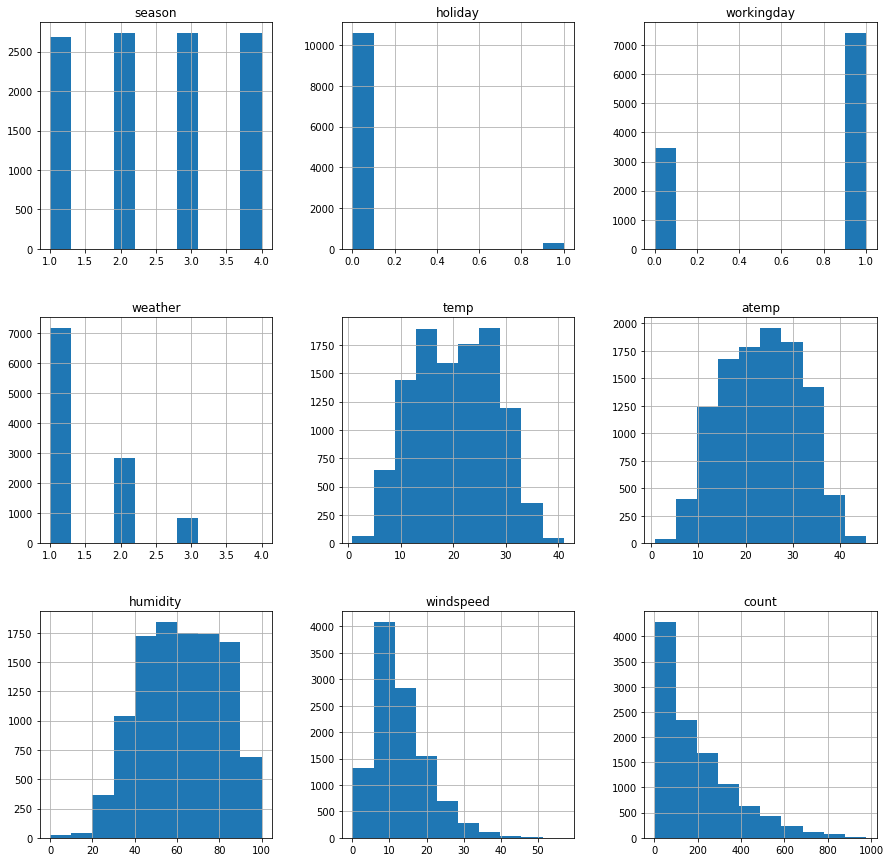

In [26]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
train.hist(ax = ax)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


In [28]:
# create a new feature
train["datetime"] = pd.to_datetime(train.loc[:, "datetime"])
test["datetime"] = pd.to_datetime(test.loc[:, "datetime"])

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 850.6 KB


In [30]:
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  count  
0        81        0.0     16  
1        80        0.0     40  
2        80        0.0     32  
3        75        0.0     13  
4        75        0.0      1

Add separate features from datetime column:

In [31]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour

Do the same for the test data:

In [32]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour

Dataframe after adding new datetime-features:

In [33]:
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  count  year  month  day  hour  
0        81        0.0     16  2011      1    1     0  
1        80        0.0     40  2011      1    1     1  
2        80        0.0     32  2011      1    1     2  
3        75        0.0     13  2011      1    1     3  
4        75        0.0      1  2011      1    1     4

In [34]:
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  year  month  day  hour  
0        56    26.0027  2011      1   20     0  
1        56     0.0000  2011      1   20     1  
2        56     0.0000  2011      1   20     2  
3        56    11.0014  2011      1   20     3  
4        56    11.0014  2011      1   20     4

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [35]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [36]:
# View are new feature
train.head()

datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  count  year  month  day  hour  
0        81        0.0     16  2011      1    1     0  
1        80        0.0     40  2011      1    1     1  
2        80        0.0     32  2011      1    1     2  
3        75        0.0     13  2011      1    1     3  
4        75        0.0      1  2011      1    1     4

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'hour'}>]], dtype=object)

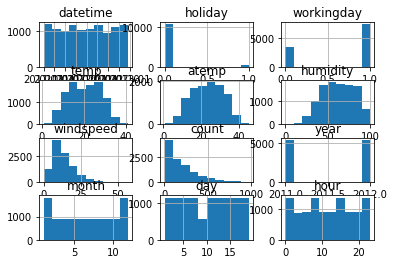

In [37]:
# View histogram of all features again now with the hour feature
train.hist()

Write updated dataframe with new features to disk:

In [38]:
train.to_csv("train_new_features.csv", index=False)

In [39]:
test.to_csv("test_new_features.csv", index=False)

## Step 5: Rerun the model with the same settings as before, just with more features

In [40]:
#predictor_new_features = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(train_data=train, time_limit=600, presets="best_quality")

In [41]:
#predictor_new_features.fit_summary()

### Create predictions from test dataset

In [42]:
#predictions_new_features = predictor_new_features.predict(test)
#predictions_new_features.head()

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [43]:
# Describe the `predictions` series to see if there are any negative values
#predictions_new_features.describe()

In [44]:
# How many negative values do we have?
#predictions_new_features_value_counts = predictions_new_features.value_counts()
#predictions_new_features_value_counts.loc[predictions_new_features_value_counts.index < 0.0]

In [45]:
# Remember to set all negative values to zero
#predictions_new_features[predictions_new_features < 0] = 0

In [46]:
# Same thing as train and test dataset
#submission_new_features = pd.read_csv('sampleSubmission.csv')

In [47]:
# Same submitting predictions
#submission_new_features["count"] = predictions_new_features
#submission_new_features.to_csv("submission_new_features.csv", index=False)

In [48]:
#!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

In [49]:
#!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `0.70872`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

### Train and submit models with hyperparamters

Setting custom hyperparameters for different models to use initial, new_features and hpo model:

In [50]:
import autogluon.core as ag

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': 0.001,  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': 'relu',  # activation function used in NN (categorical hyperparameter, default = first entry)
    'dropout_prob': 0.2,  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': 36,  # number of leaves in trees (integer hyperparameter)
}

xgb_options = {  # specifies non-default hyperparameter values for xgboost
    'learning_rate': 0.002,  # Step size shrinkage used in update to prevent overfitting
    'max_depth': 5,  # Maximum depth of a tree. Higher values make the model more complex and tend to overfit
    'reg_lambda': 1.2, # L2 regularization term on weights. Increasing this value will make model more conservative. Higher values mean higher penalization of weights
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                   'XGB': xgb_options
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

time_limit = 2*60  # train various models for ~2 min
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

## Initial Model:

In [51]:
train_initial = pd.read_csv('train.csv').drop(['casual','registered'], axis=1)

In [52]:
predictor = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(train_data=train_initial, time_limit=60, presets="best_quality", hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

No path specified. Models will be saved in: "AutogluonModels/ag-20220407_202702/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels/ag-20220407_202702/"
AutoGluon Version:  0.4.0
Python Version:     3.7.10
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3034.5 MB
	Train Data (Original)  Memory Usage: 1.52 

In [53]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   LightGBM_BAG_L1/T1 -135.473207       0.083057  14.212350                0.083057          14.212350            1       True          1
1  WeightedEnsemble_L2 -135.473207       0.083888  14.396765                0.000830           0.184415            2       True          3
2   LightGBM_BAG_L2/T1 -135.893138       0.430758  50.636688                0.067296          13.936430            2       True          4
3  WeightedEnsemble_L3 -135.893138       0.431443  50.641224                0.000685           0.004536            3       True          6
4    XGBoost_BAG_L1/T1 -147.951321       0.280404  22.487909                0.280404          22.487909            1       True          2
5    XGBoost_BAG_L2/T1 -234.911873       0.370480  36.926049                0.007019           0.225791 

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -135.4732072756916,
  'XGBoost_BAG_L1/T1': -147.95132143736683,
  'WeightedEnsemble_L2': -135.4732072756916,
  'LightGBM_BAG_L2/T1': -135.89313838540303,
  'XGBoost_BAG_L2/T1': -234.91187263724677,
  'WeightedEnsemble_L3': -135.89313838540303},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM_BAG_L1/T1': 'AutogluonModels/ag-20220407_202702/models/LightGBM_BAG_L1/T1/',
  'XGBoost_BAG_L1/T1': 'AutogluonModels/ag-20220407_202702/models/XGBoost_BAG_L1/T1/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20220407_202702/models/WeightedEnsemble_L2/',
  'LightGBM_BAG_L2/T1': 'AutogluonModels/ag-20220407_202702/

In [54]:
predictions = predictor.predict(test)
predictions.head()

0    69.630936
1    56.885334
2    56.885334
3    66.387871
4    66.387871
Name: count, dtype: float32

In [55]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [56]:
submission["count"] = predictions
submission.to_csv("submission_initial.csv", index=False)

In [57]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "initial model with hyperparameters - nn, gbm, xgboost"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 308kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [58]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                                   status    publicScore  privateScore  
---------------------------  -------------------  ------------------------------------------------------------  --------  -----------  ------------  
submission.csv               2022-04-07 20:28:13  initial model with hyperparameters - nn, gbm, xgboost         complete  1.34025      1.34025       
submission_new_hpo.csv       2022-04-07 18:30:16  hpo model with hyperparameters - nn, gbm, xgboost             complete  0.69743      0.69743       
submission_new_features.csv  2022-04-07 18:26:20  new features with hyperparameters - nn, gbm, xgboost          complete  0.50637      0.50637       
submission.csv               2022-04-07 18:24:59  initial model with hyperparameters - nn, gbm, xgboost         complete  1.34025      1.34025       


#### Initial model score with hyperparameters: `1.34025`

## New Features Model:

In [59]:
train_new_features = pd.read_csv('train_new_features.csv')
test_new_features = pd.read_csv('test_new_features.csv')

In [60]:
predictor_new_features = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(train_data=train_new_features, time_limit=60, presets="best_quality", hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

No path specified. Models will be saved in: "AutogluonModels/ag-20220407_202814/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels/ag-20220407_202814/"
AutoGluon Version:  0.4.0
Python Version:     3.7.10
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2747.53 MB
	Train Data (Original)  Memory Usage: 1.8

In [61]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        LightGBM_BAG_L1/T2  -37.830180       0.107414  14.146969                0.107414          14.146969            1       True          2
1       WeightedEnsemble_L2  -37.830180       0.108056  14.446519                0.000642           0.299550            2       True          5
2        LightGBM_BAG_L1/T1  -40.331143       0.101246  13.608075                0.101246          13.608075            1       True          1
3        LightGBM_BAG_L2/T1  -67.151297       0.392980  52.556729                0.083429          13.827756            2       True          6
4       WeightedEnsemble_L3  -67.151297       0.393981  52.562657                0.001001           0.005929            3       True          8
5  NeuralNetTorch_BAG_L1/T1 -132.231939       0.023743   0.878262         

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1/T1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -40.331143321893705,
  'LightGBM_BAG_L1/T2': -37.83018030691863,
  'XGBoost_BAG_L1/T1': -206.88356980650212,
  'NeuralNetTorch_BAG_L1/T1': -132.23193894470973,
  'WeightedEnsemble_L2': -37.83018030691863,
  'LightGBM_BAG_L2/T1': -67.15129746478266,
  'XGBoost_BAG_L2/T1': -233.12670025714664,
  'WeightedEnsemble_L3': -67.15129746478266},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM_BAG_L1/T1': 'AutogluonModels/ag-20220407_202814/models/LightGBM_BAG_L1/T1/',
  'LightGBM_BAG_

In [62]:
predictions_new_features = predictor_new_features.predict(test)

In [63]:
# Remember to set all negative values to zero
predictions_new_features[predictions_new_features < 0] = 0

In [64]:
# Same thing as train and test dataset
submission_new_features = pd.read_csv('sampleSubmission.csv')

In [65]:
# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [66]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features with hyperparameters - nn, gbm, xgboost"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 400kB/s]
Successfully submitted to Bike Sharing Demand

In [67]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                                   status    publicScore  privateScore  
---------------------------  -------------------  ------------------------------------------------------------  --------  -----------  ------------  
submission_new_features.csv  2022-04-07 20:29:25  new features with hyperparameters - nn, gbm, xgboost          complete  0.52779      0.52779       
submission.csv               2022-04-07 20:28:13  initial model with hyperparameters - nn, gbm, xgboost         complete  1.34025      1.34025       
submission_new_hpo.csv       2022-04-07 18:30:16  hpo model with hyperparameters - nn, gbm, xgboost             complete  0.69743      0.69743       
submission_new_features.csv  2022-04-07 18:26:20  new features with hyperparameters - nn, gbm, xgboost          complete  0.50637      0.50637       


#### New features model score with hyperparameters: `0.52779`

## HPO Model:

In [68]:
predictor_new_hpo = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(train_data=train_new_features, time_limit=60, presets="best_quality", hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

No path specified. Models will be saved in: "AutogluonModels/ag-20220407_202927/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels/ag-20220407_202927/"
AutoGluon Version:  0.4.0
Python Version:     3.7.10
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2742.8 MB
	Train Data (Original)  Memory Usage: 1.87

In [69]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        LightGBM_BAG_L1/T2  -37.830180       0.121447  13.893607                0.121447          13.893607            1       True          2
1       WeightedEnsemble_L2  -37.830180       0.122356  14.166371                0.000909           0.272763            2       True          5
2        LightGBM_BAG_L1/T1  -40.331143       0.096604  14.152921                0.096604          14.152921            1       True          1
3        LightGBM_BAG_L2/T1  -52.632311       0.415519  52.171600                0.089759          13.939730            2       True          6
4       WeightedEnsemble_L3  -52.632311       0.416426  52.177279                0.000908           0.005679            3       True          8
5  NeuralNetTorch_BAG_L1/T1 -132.231939       0.025312   1.095859         

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1/T1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -40.331143321893705,
  'LightGBM_BAG_L1/T2': -37.83018030691863,
  'XGBoost_BAG_L1/T1': -220.0413912158949,
  'NeuralNetTorch_BAG_L1/T1': -132.23193894470973,
  'WeightedEnsemble_L2': -37.83018030691863,
  'LightGBM_BAG_L2/T1': -52.63231073538343,
  'XGBoost_BAG_L2/T1': -233.57451727645378,
  'WeightedEnsemble_L3': -52.63231073538343},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM_BAG_L1/T1': 'AutogluonModels/ag-20220407_202927/models/LightGBM_BAG_L1/T1/',
  'LightGBM_BAG_L

In [70]:
predictions_new_hpo = predictor_new_hpo.predict(test)

In [71]:
# Remember to set all negative values to zero
predictions_new_hpo[predictions_new_hpo < 0] = 0

In [72]:
submission_new_hpo = pd.read_csv("sampleSubmission.csv")

In [73]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo_hyperparameters.csv", index=False)

In [74]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "hpo model with hyperparameters - nn, gbm, xgboost"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 340kB/s]
Successfully submitted to Bike Sharing Demand

In [75]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                                   status    publicScore  privateScore  
---------------------------  -------------------  ------------------------------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-04-07 20:30:37  hpo model with hyperparameters - nn, gbm, xgboost             complete  0.69743      0.69743       
submission_new_features.csv  2022-04-07 20:29:25  new features with hyperparameters - nn, gbm, xgboost          complete  0.52779      0.52779       
submission.csv               2022-04-07 20:28:13  initial model with hyperparameters - nn, gbm, xgboost         complete  1.34025      1.34025       
submission_new_hpo.csv       2022-04-07 18:30:16  hpo model with hyperparameters - nn, gbm, xgboost             complete  0.69743      0.69743       


#### New Score of `0.69743`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

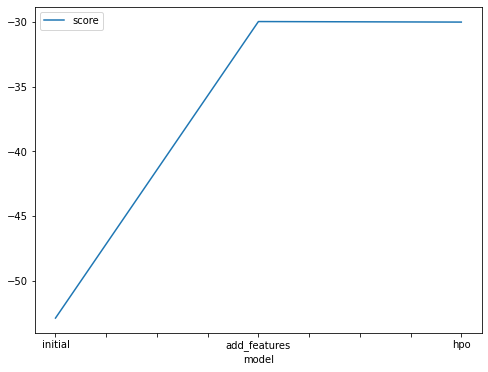

In [76]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-52.894444, -29.967423, -30.007972]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

We can clearly see, that the model performed substantially better with engineered features. The hyperparameter optimization does not make such a big difference in this case.

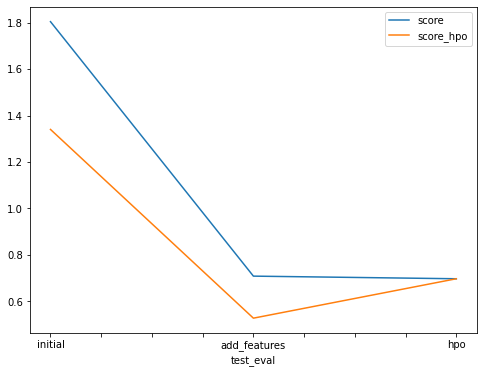

In [84]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80423, 0.70872, 0.69743],
        "score_hpo": [1.34025, 0.52779, 0.69743]
    }
).plot(x="test_eval", y=["score","score_hpo"], figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

The graph shows basically the same as the one above. The models score got lower with the added features and slightly lower with hpo.

### Hyperparameter table

In [78]:
import numpy as np

In [80]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "learning-rate": [0.001, 0.001, 0.001],
    "num_epochs": [10, 10, 10],
    "max_depth": [5, 5, 5],
    "score": [1.34025, 0.52779, 0.69743]
})

model  learning-rate  num_epochs  max_depth    score
0       initial          0.001          10          5  1.34025
1  add_features          0.001          10          5  0.52779
2           hpo          0.001          10          5  0.69743